# Simple Text

In this example we go through a light example of processing a dataset for analyzing text!

The data comes from this [website at Cornell](http://www.cs.cornell.edu/people/pabo/movie-review-data/) and is from Bo Pang and Lillian Lee, A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization Based on Minimum Cuts, Proceedings of ACL 2004.

This contains 1000 positive and 1000 negative reviews.

In [1]:
# Includes and Standard Magic...
### Standard Magic and startup initializers.

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd
# Load SQLITE
import sqlite3
# Load Stats
from scipy import stats

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('fivethirtyeight')

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# These are both in huge directories so let's make 2 data frames.

import glob

all_pos = glob.glob("./data/review_polarity/pos/*")
all_neg = glob.glob("./data/review_polarity/neg/*")
    

In [3]:
# Let's look at a review and see what's up..
with open('./data/review_polarity/pos/cv839_21467.txt') as f:
    x = f.readlines()
x

['assume nothing . \n',
 "the phrase is perhaps one of the most used of the 1990's , as first impressions and rumors are hardly ever what they seem to be . \n",
 'the phrase especially goes for oscar novak , an architect who is the main focus of three to tango , a delightful , funny romantic comedy about assumptions and being yourself . \n',
 'novak ( matthew perry ) , a shy , clumsy , chicago based architect , along with openly gay partner , peter steinberg ( oliver platt ) , fights for projects day in and day out . \n',
 'one of these is the job of restoring a popular building for charles newman ( dylan mcdermott ) , a rich , well-known businessman . \n',
 'charles immediately takes a liking to oscar , as he enjoys his personality and sense of humor . \n',
 'seeing oscar as someone he could trust , charles asks him to watch his girlfriend , an unpredictable , adventurous girl named amy post ( neve campbell ) , who makes a living by blowing glass . \n',
 'charles wants to know who she

In [5]:
# It's a little messy so let's clean out some of the stuff and join it into one documet.
import re
re.sub(r'[.,\'\"\s\s+]', " ", "".join(x))

'assume nothing    the phrase is perhaps one of the most used of the 1990 s   as first impressions and rumors are hardly ever what they seem to be    the phrase especially goes for oscar novak   an architect who is the main focus of three to tango   a delightful   funny romantic comedy about assumptions and being yourself    novak ( matthew perry )   a shy   clumsy   chicago based architect   along with openly gay partner   peter steinberg ( oliver platt )   fights for projects day in and day out    one of these is the job of restoring a popular building for charles newman ( dylan mcdermott )   a rich   well-known businessman    charles immediately takes a liking to oscar   as he enjoys his personality and sense of humor    seeing oscar as someone he could trust   charles asks him to watch his girlfriend   an unpredictable   adventurous girl named amy post ( neve campbell )   who makes a living by blowing glass    charles wants to know who she talks to   what she does   and where she g

In [17]:
# So now we're read to read and fix up each of the reviews.

revs = []

for fname in all_pos:
    rec = {}
    with open(fname) as f:
        x = f.readlines()
    rec['text'] = re.sub(r'[.,\'\"\s\s+]', " ", "".join(x))
    rec['sentiment'] = 'positive'
    revs.append(rec)

for fname in all_neg:
    rec = {}
    with open(fname) as f:
        x = f.readlines()
    rec['text'] = re.sub(r'[.,\'\"\s\s+]', " ", "".join(x))
    rec['sentiment'] = 'negative'
    revs.append(rec)
    
df_reviews = pd.DataFrame(revs)

In [18]:
df_reviews

,text,sentiment
0,assume nothing the phrase is perhaps one of...,positive
1,plot : derek zoolander is a male model he i...,positive
2,i actually am a fan of the original 1961 or so...,positive
3,a movie that s been as highly built up as the ...,positive
4,good will hunting is two movies in one : ...,positive
...,...,...
1995,synopsis : when a meteorite crashlands in the ...,negative
1996,it s now the anniversary of the slayings of ju...,negative
1997,coinciding with the emerging popularity of mov...,negative
1998,and now the high-flying hong kong style of fil...,negative


## Now for the fun part...

Now that we have some data to work with let's make some tf-idf vectors

We're going to work with [tf-idf vectorizer from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

There are other options and a lot more you could do using sklearn! [See here](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction).

In [56]:
# Vectorize the whole thing...
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [57]:
# Vectorize and play with token sizes...
vec = TfidfVectorizer(min_df = 0.05, 
                      max_df = 0.85, 
                      ngram_range=(1,1)) # play with min_df and max_df

# transform this into a sparse vector!
vec.fit(df_reviews['text'])
tf_idf_sparse = vec.transform(df_reviews["text"])
tf_idf_sparse

<2000x1095 sparse matrix of type '<class 'numpy.float64'>'
	with 343469 stored elements in Compressed Sparse Row format>

What we're doing above is taking the reviews, and computing the tfidf scores for them if we cut off min_df and max_df, so we get letf with fewer words.  We can see the set of words along with the actual tfidf vectors!

In [37]:
# and for a review we can see the ROW of it's encoding.

print(tf_idf_sparse[0, :])

  (0, 1094)	0.04743827877186096
  (0, 1093)	0.02758215573084594
  (0, 1091)	0.04763382198802594
  (0, 1083)	0.0334324321674167
  (0, 1077)	0.05713625342189727
  (0, 1068)	0.04092056427905962
  (0, 1067)	0.04022906716224983
  (0, 1066)	0.08358391490689109
  (0, 1055)	0.03950117692141767
  (0, 1052)	0.027074501372070604
  (0, 1046)	0.03442130116997448
  (0, 1044)	0.0214524726019578
  (0, 1043)	0.016077575018167947
  (0, 1041)	0.03300862612480805
  (0, 1040)	0.02447328900505239
  (0, 1038)	0.07859567399153064
  (0, 1032)	0.029829606863754604
  (0, 1028)	0.03137930283380131
  (0, 1026)	0.03239470696240463
  (0, 1022)	0.040791877507975124
  (0, 1007)	0.04366655094211847
  (0, 1004)	0.06952076286106318
  (0, 998)	0.08749578859632079
  (0, 990)	0.039706231208588315
  (0, 980)	0.03437672859128048
  :	:
  (0, 129)	0.03355322725030074
  (0, 122)	0.048476321660917664
  (0, 108)	0.026389772946399426
  (0, 107)	0.03912012215663593
  (0, 101)	0.031059015145505648
  (0, 96)	0.050607871550267115
  (0,

In [38]:
# We can now use this to classify the reviews!! but we need to test/train split again.

# Split..
X_train, X_test, y_train, y_test = train_test_split(tf_idf_sparse, 
                                                    df_reviews['sentiment'], 
                                                    test_size=0.2)

In [39]:
logisticRegr = LogisticRegression(max_iter=100000, class_weight='balanced') 
model = logisticRegr.fit(X_train, y_train)

0.825


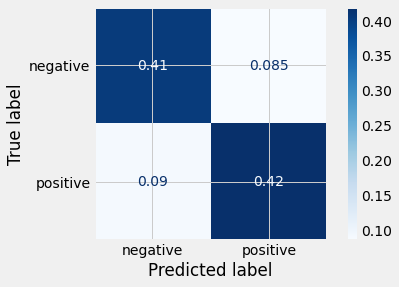

In [40]:
# As always we should check our confusing matrix...
# Check and confusion matrix...
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=logisticRegr.classes_,
                                 cmap=plt.cm.Blues, normalize='all')

In [41]:
logisticRegr.classes_

array(['negative', 'positive'], dtype=object)

In [50]:
logisticRegr.coef_[:,0]

array([0.66881965])

In [54]:
# We can also do cool stuff like make a dataframe with the words and see which
# have the highest regression weights -- careful here!

# Make a dataframe with the words, coefficients, and classes...
recs = []
for w,i in vec.vocabulary_.items():
    recs.append([str(w)] + list(logisticRegr.coef_[:,i]))
# If we only have one class then we only get weight..
# df_weights = pd.DataFrame(tripples, columns=['word']+list(logisticRegr.classes_))
df_weights = pd.DataFrame(recs, columns=['word', 'weight'])

In [55]:
df_weights.sort_values('weight', ascending=False)[:25]

,word,weight
84,great,2.129611
254,life,1.907991
206,very,1.829938
32,well,1.785682
205,also,1.687434
2,most,1.627940
123,quite,1.413619
166,many,1.404904
934,war,1.393081
500,perfectly,1.386285


74